## Detect changes

Based on https://docs.dea.ga.gov.au/notebooks/How_to_guides/Land_cover_change_mapping/

In [143]:
import numpy as np
import odc.geo  # noqa

import numpy as np
import xarray as xr

In [ ]:
%matplotlib inline

In [144]:
# Define variables 2022
bareland_2022 = xr.open_dataset("Test_change_detection/Nadi_bareland_2022.tif")
quarry_2022 = xr.open_dataset("Test_change_detection/Nadi_quarry_2022.tif")
bareland_quarry_2022 = xr.open_dataset("Test_change_detection/Nadi_bareland_quarry_2022.tif")
# Nadi_bareland = "Test_change_detection/Nadi_bareland_2022.tif"

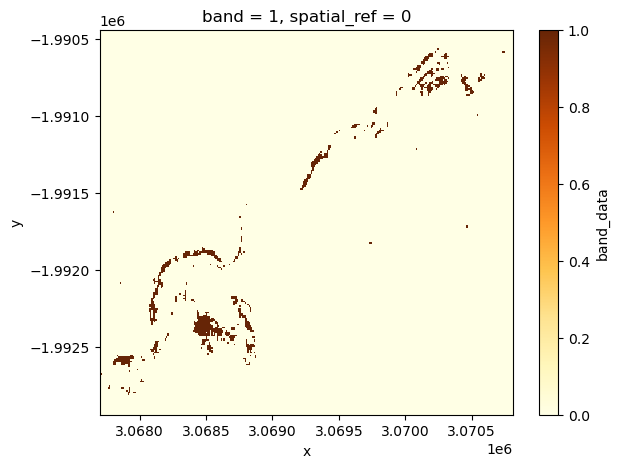

In [169]:
# bareland_2022.band_data.plot(cmap="YlOrBr", size=5)
# quarry_2022.band_data.plot(cmap="YlOrBr", size=5)
bareland_quarry_2022.band_data.plot(cmap="YlOrBr", size=5)

In [170]:
# Define variables 2023
# bareland_2023 = xr.open_dataset("Test_change_detection/Nadi_bareland_2023.tif")
# quarry_2023 = xr.open_dataset("Test_change_detection/Nadi_quarry_2023.tif")
bareland_quarry_2023 = xr.open_dataset("Test_change_detection/Nadi_bareland_quarry_2023.tif")
# Nadi_bareland = "Test_change_detection/Nadi_bareland_2022.tif"

In [147]:
# bareland_2023.band_data.plot(cmap="YlOrBr", size=5)
# quarry_2023.band_data.plot(cmap="YlOrBr", size=5)
# bareland_quarry_2023.band_data.plot(cmap="YlOrBr", size=5)

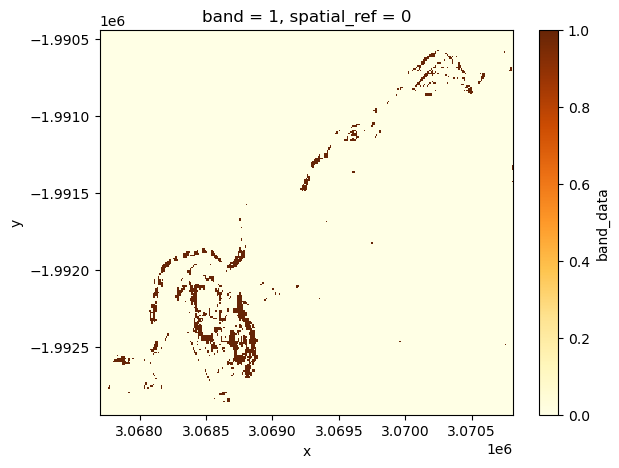

In [171]:
# bareland_2023.band_data.plot(cmap="YlOrBr", size=5)
bareland_quarry_2023.band_data.plot(cmap="YlOrBr", size=5)


In [155]:
# # Define starts and ends
# quarry_start = quarry_2022.lc.astype(np.int32)
# bareland_start = bareland_2022.lc.astype(np.int32)

# quarry_end = quarry_2023.lc.astype(np.int32)
# bareland_end = bareland_2023.lc.astype(np.int32)

# # Ignore no changes
# # ignore_no_change = True

In [156]:
# Define starts and ends
quarry_start = quarry_2022.astype(np.int32)
bareland_start = bareland_2022.astype(np.int32)

quarry_end = quarry_2023.astype(np.int32)
bareland_end = bareland_2023.astype(np.int32)

# Ignore no changes
# ignore_no_change = True

In [175]:
change_bareland_quarry = bareland_quarry_2022 - bareland_quarry_2023

In [176]:
change_bareland_quarry

<xarray.Dataset>
Dimensions:      (band: 1, x: 311, y: 250)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.068e+06 3.068e+06 ... 3.071e+06 3.071e+06
  * y            (y) float64 -1.99e+06 -1.99e+06 ... -1.993e+06 -1.993e+06
    spatial_ref  int64 0
Data variables:
    band_data    (band, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

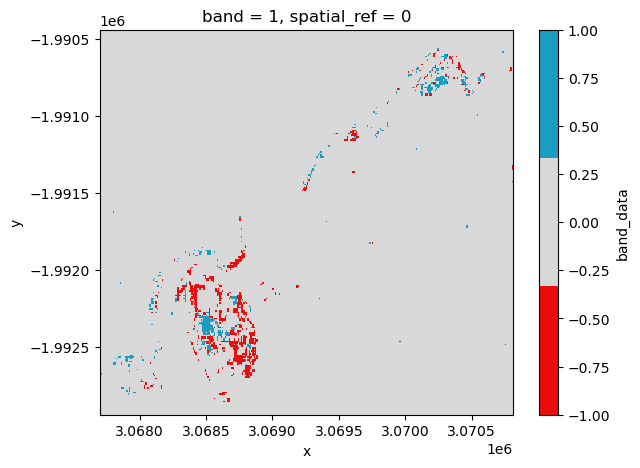

In [177]:
change_bareland_quarry.band_data.plot(cmap=cd_map, size=5)

In [157]:
change_quarry = quarry_start - quarry_end

In [158]:
change_quarry

<xarray.Dataset>
Dimensions:      (band: 1, x: 311, y: 250)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.068e+06 3.068e+06 ... 3.071e+06 3.071e+06
  * y            (y) float64 -1.99e+06 -1.99e+06 ... -1.993e+06 -1.993e+06
    spatial_ref  int64 0
Data variables:
    band_data    (band, y, x) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    lc           int32 0

In [178]:
change_bareland_quarry.band_data.odc.write_cog("Sabeto_change_bareland_quarry.tif", overwrite=True)

PosixPath('Flametree_change_bareland_quarry.tif')

In [159]:
from matplotlib import colors

cd_classes = [
    [-1, "degradation", "#eb0c0c"],
    [0, "no change", "#d8d8d8"],
    [1, "restoration", "#1a9dc1"]
]

values_list = [c[0] for c in cd_classes]
cd_color_list = [c[2] for c in cd_classes]


In [160]:
cd_color_list = [cd[2] for cd in cd_classes]

cd_map = colors.ListedColormap(cd_color_list)

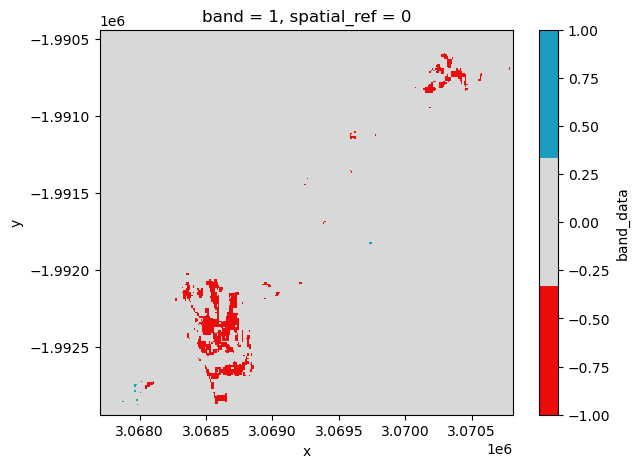

In [161]:
change_quarry.band_data.plot(cmap=cd_map, size=5)

In [162]:
change_quarry.band_data.odc.write_cog("Sabeto_change_quarry.tif", overwrite=True)

PosixPath('Flametree_change_quarry.tif')